# Predicting house prices using Deep Q-Learning

In [1]:

#pip install tensorflow
#pip install keras

# Importing the libraries
import warnings
warnings.filterwarnings('ignore')
import tensorflow as tf
import pandas as pd
import numpy as np
import tensorflow.keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

In [2]:
# Importing the dataset
dataset = pd.read_csv('kc_house_data.csv')

In [3]:
dataset.shape

(21613, 21)

In [4]:
dataset.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [5]:
X=dataset.iloc[:, 3:].values
X

array([[ 3.00000e+00,  1.00000e+00,  1.18000e+03, ..., -1.22257e+02,
         1.34000e+03,  5.65000e+03],
       [ 3.00000e+00,  2.25000e+00,  2.57000e+03, ..., -1.22319e+02,
         1.69000e+03,  7.63900e+03],
       [ 2.00000e+00,  1.00000e+00,  7.70000e+02, ..., -1.22233e+02,
         2.72000e+03,  8.06200e+03],
       ...,
       [ 2.00000e+00,  7.50000e-01,  1.02000e+03, ..., -1.22299e+02,
         1.02000e+03,  2.00700e+03],
       [ 3.00000e+00,  2.50000e+00,  1.60000e+03, ..., -1.22069e+02,
         1.41000e+03,  1.28700e+03],
       [ 2.00000e+00,  7.50000e-01,  1.02000e+03, ..., -1.22299e+02,
         1.02000e+03,  1.35700e+03]])

In [6]:
X = X[:, np.r_[0:13,14:18]]
X

array([[ 3.00000e+00,  1.00000e+00,  1.18000e+03, ..., -1.22257e+02,
         1.34000e+03,  5.65000e+03],
       [ 3.00000e+00,  2.25000e+00,  2.57000e+03, ..., -1.22319e+02,
         1.69000e+03,  7.63900e+03],
       [ 2.00000e+00,  1.00000e+00,  7.70000e+02, ..., -1.22233e+02,
         2.72000e+03,  8.06200e+03],
       ...,
       [ 2.00000e+00,  7.50000e-01,  1.02000e+03, ..., -1.22299e+02,
         1.02000e+03,  2.00700e+03],
       [ 3.00000e+00,  2.50000e+00,  1.60000e+03, ..., -1.22069e+02,
         1.41000e+03,  1.28700e+03],
       [ 2.00000e+00,  7.50000e-01,  1.02000e+03, ..., -1.22299e+02,
         1.02000e+03,  1.35700e+03]])

In [7]:
y = dataset.iloc[:, 2].values
y

array([221900., 538000., 180000., ..., 402101., 400000., 325000.])

In [8]:
# Getting separately the features and the targets
X = dataset.iloc[:, 3:].values
X = X[:, np.r_[0:13,14:18]]
y = dataset.iloc[:, 2].values

In [9]:
# Splitting the dataset into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)


### Min-Max Normalization

In [10]:
# Scaling the features
xscaler = MinMaxScaler(feature_range = (0,1))
X_train = xscaler.fit_transform(X_train)
X_test = xscaler.transform(X_test)

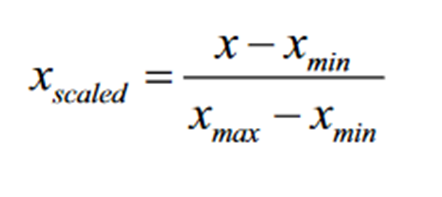

In [11]:
# Scaling the target
yscaler = MinMaxScaler(feature_range = (0,1))
y_train = yscaler.fit_transform(y_train.reshape(-1,1))
y_test = yscaler.transform(y_test.reshape(-1,1))

In [12]:
# Building the Artificial Neural Network
model = Sequential()
model.add(Dense(units = 64, kernel_initializer = 'uniform', activation = 'relu', input_dim = 17))
model.add(Dense(units = 16, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'relu'))
model.compile(optimizer = Adam(lr = 0.001), loss = 'mse', metrics = ['mean_absolute_error'])

In [13]:
# Training the Artificial Neural Network
model.fit(X_train, y_train, batch_size = 32, epochs = 100, validation_data = (X_test, y_test))

Epoch 1/100
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Constant'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Constant'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
502/541 [==========================>...] - ETA: 0s - loss: 0.0011 - mean_absolute_error: 0.0194WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x000001695C5CF160> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) an

Epoch 37/100
541/541 [==============================] - 0s 803us/step - loss: 2.7365e-04 - mean_absolute_error: 0.0103 - val_loss: 2.8920e-04 - val_mean_absolute_error: 0.0096
Epoch 38/100
541/541 [==============================] - 0s 841us/step - loss: 2.8171e-04 - mean_absolute_error: 0.0104 - val_loss: 2.5393e-04 - val_mean_absolute_error: 0.0095
Epoch 39/100
541/541 [==============================] - 0s 783us/step - loss: 2.8985e-04 - mean_absolute_error: 0.0107 - val_loss: 2.7049e-04 - val_mean_absolute_error: 0.0106
Epoch 40/100
541/541 [==============================] - 1s 944us/step - loss: 2.6429e-04 - mean_absolute_error: 0.0102 - val_loss: 2.6591e-04 - val_mean_absolute_error: 0.0096
Epoch 41/100
541/541 [==============================] - 0s 824us/step - loss: 2.7473e-04 - mean_absolute_error: 0.0104 - val_loss: 2.6873e-04 - val_mean_absolute_error: 0.0101
Epoch 42/100
541/541 [==============================] - 0s 794us/step - loss: 2.7190e-04 - mean_absolute_error: 0.0104 -

In [14]:
# Making predictions on the test set while reversing the scaling
y_test = yscaler.inverse_transform(y_test)
prediction = yscaler.inverse_transform(model.predict(X_test))

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Constant'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Constant'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


In [15]:
predicted_price=np.column_stack((y_test,prediction))
predicted_price

array([[ 297000.     ,  313288.3125 ],
       [1578000.     , 1826742.75   ],
       [ 562100.     ,  542008.6875 ],
       ...,
       [ 369950.     ,  398432.34375],
       [ 300000.     ,  247826.15625],
       [ 575950.     ,  476336.875  ]])

In [16]:
# Computing the error rate
error = abs(prediction - y_test)/y_test
print(np.mean(error))

0.13566966149613305
